In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pandas-profiling==2.7.1
!pip install surprise

     |████████████████████████████████| 256kB 5.2MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 1.1MB 5.8MB/s 
     |████████████████████████████████| 81kB 6.9MB/s 
     |████████████████████████████████| 3.2MB 14.9MB/s 
     |████████████████████████████████| 296kB 42.2MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=7dd172deab904eb8d5d10740f8db699ea8509caba0043bb0857310c02061b682
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=1719e1fe87635510b607d20767f0ebf7841a2b74c08ce1a41d61de8bb5360626
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing ins

# **Sentiment Based Product Recommendation System**

## Problem Statement
 

Suppose an e-commerce company named ***Ebuss***. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, we are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, let's put forward the plan to execute. We would build a sentiment-based product recommendation system, which includes the following tasks.

1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

Let's import the important libraries first...

In [3]:
import pandas as pd
import pandas_profiling
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **1. Data Sourcing and sentiment analysis**
Let's start with the first step and perform tasks required to complete this step. The following is the list of tasks under ***Data sourcing and sentimental analysis***

*   Exploratory data analysis
*   Data cleaning
*   Text preprocessing
*   Feature extraction
*   Training a text classification model

Before that, let's import the data...




### **Data Reading**

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/content/sample30.csv')

In [5]:
df.shape

(30000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

### **Exploratory Data Analysis**

Let's perform some exploratory Data Analysis.





In [ ]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations from above pandas summary are as follows:

*   **`AVpf3VOfilAPnD_xjpun`** is most reviewed product with **`~8545`** reviews i.e. **`28.5%`** of total dataset. 
*   **`Clorox`** brand is quite famous for reviews followed by **`Warner Home Video`**.
*   There are **`271`** unique products that are reviewed in the dataset.
*   Highest number of reviews were on **`2012-01-26`**.
*   The **`reviews_didPurchase`** is highly imbalanced with **`46.9%`** missing values. It would not be a good feature to consider.
*   The **`reviews_didRecommend`** is too highly imbalanced with **`86.3% - true`** values. 
*   It looks like people mostly review the products they like as around **`69.4%`** of reviews having **`5`** ratings.
*   The text field **`reviews_text`** has some characters part from alphabets that might need some pre-processing like *emoji conversion, converting abbreviations to actual words* etc.
*   The geographic details of the user would not help in any prediction as they are inconsistent columns with high rate of missing values.

*   The dependent variable `user_sentiment` poses a problem of class imbalance as `88.8%` of true values. We can take care of it using techniques like SMOTE.

*   There are no duplicates in the dataset.



Let's try to perform some more EDA on the famous product and other business related metrics.

In [ ]:
top_product = df[(df['id']=="AVpf3VOfilAPnD_xjpun")]

top_product

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
6479,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T13:31:39.000Z,NaN,True,1,"This is an outstanding product, it not only cl...",Fresh Smell,NaN,NaN,barsea,Positive
6480,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-15T15:47:17.000Z,NaN,NaN,1,I have been an avid user of Clorox Wipes for m...,Smell,NaN,NaN,sofia50,Positive
6481,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-29T07:41:03.000Z,NaN,NaN,1,I have used Clorox Wipes for years... Cannot l...,Who Changed The Scent??,Forney,NaN,renee65,Positive
6482,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-26T00:03:29.000Z,NaN,NaN,1,I use Clorox wipes fanatically all over my hom...,New Product Stinks,NaN,NaN,angi677,Positive
6483,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,1,"Being a mom of three, disinfecting the home ha...",Germ free,NaN,NaN,brandy33,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15019,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-18T00:00:00.000Z,False,True,5,Thia is a amazing product that fight germs and...,i love this product,NaN,NaN,jcyrachel69,Positive
15020,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,I love clorox wipes. They are very convenient ...,Clorox Wipes,NaN,NaN,tiffmillion,Positive
15021,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,"Easy to clean with just a wipe, The wipes are ...",Love the Wipes,NaN,NaN,karingbear,Positive
15022,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,"I love their wipes they are easy to use, quick...",Love,NaN,NaN,rocky200718,Positive


In [ ]:
print('name - ', top_product['name'][6479])
print('review - ', top_product['reviews_text'][6479])

name -  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
review -  This is an outstanding product, it not only cleans surfaces, but it has such a clean and fresh smell..I use it all the time.


**Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total** is a surface cleaning product and some sensory flavour. Let's try to understand the overall reviews of this product by all users. Starting by getting the popularity of the product over the years.


In [ ]:
# average rating of the product
top_product.groupby('name')['reviews_rating'].mean()

name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total    4.82048
Name: reviews_rating, dtype: float64

Overall average rating of this product is `4.82`, which is quite impressive. Let's plot it across years now.

,year,reviews_rating
0,2011,5.000000
1,2012,4.878001
2,2013,4.676259
3,2014,4.805358
4,2015,4.807985
5,2016,4.740000
6,2017,4.523810


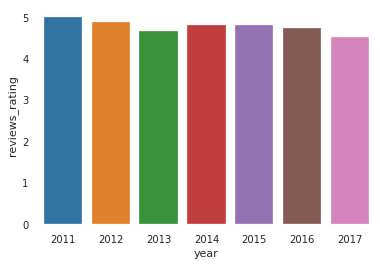

In [ ]:
# Extract the year from review date
top_product['year'] = pd.DatetimeIndex(top_product['reviews_date']).year

# Calculate mean rating per year
mean_rating = top_product.groupby('year').mean()
mean_rating.reset_index(inplace=True)

# Plot average rating vs year
sns.barplot(x='year', y='reviews_rating', data=mean_rating);
mean_rating

2014    3658
2015    2630
2012    2041
2013     139
2016      50
2017      21
2011       6
Name: year, dtype: int64

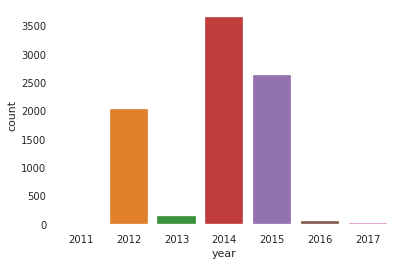

In [ ]:
# Plot number of reviews per year
sns.countplot(top_product['year'])
top_product['year'].value_counts()

**Observation**

This is a good observation. Although from average rating graph, the year `2011` seems to have `5 star` rating however, if combined with second plot it suggests that it is not a good measure as number of reviews in `2011` are very less. The `2014` seems to be much more stable rating.

Let's now move forward and try to analysze the review text feature.

**Review Text**

In [ ]:
# Method to tokenize a sentence based on regex
def RegExpTokenizer(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(sentence)

In [ ]:
# Method to tokenize a list of reviews and remove stop words
def filterStopWords(reviews):
  tokens_list = []
  for m in reviews:
    tokens = RegExpTokenizer(str(m))
    filtered_tokens = [word for word in tokens if not word in stopwords.words()]
    tokens_list.append(filtered_tokens)
  return tokens_list

In [ ]:
top_tokens = filterStopWords(top_product['reviews_text'])

top_tokens[1]

['I',
 'avid',
 'user',
 'Clorox',
 'Wipes',
 'many',
 'years',
 'loved',
 'Something',
 'changed',
 'recently',
 'last',
 '3',
 'purchases',
 'exhibited',
 'change',
 'SMELL',
 'It',
 'awful',
 'They',
 'smell',
 'I',
 'know',
 'people',
 'west',
 'coast',
 'familiar',
 'stink',
 'bugs',
 'east',
 'coast',
 'infestation',
 'That',
 'exactly',
 'Clorox',
 'wipes',
 'smell',
 'Please',
 'change',
 'back',
 'old',
 'formula',
 'QUICK']

In [ ]:
# Method to get Frequency distribution
from nltk import FreqDist
def BagOfWords(token_list):
    all_words = []
    for m in token_list:
        for w in m:
            all_words.append(w.lower())
    return FreqDist(all_words)

In [ ]:
from wordcloud import WordCloud

# Method to generate a word cloud image
def drawWordCloud(tokens):
  freq_dist = BagOfWords(tokens)
  ax = plt.figure(figsize=(15,10))
  wordcloud = WordCloud(background_color='black',max_font_size=40).generate(' '.join(freq_dist.keys()))

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  print("Total number of words:", len(freq_dist))

In [ ]:
def plotTopTokens(tokens):
  count = []
  Words  = []
  plt.figure(figsize = (10,8))
  freq_dist = BagOfWords(tokens)

  for w in freq_dist.most_common(10):
    count.append(w[1])
    Words.append(w[0])
  sns.set_style("darkgrid")
  sns.barplot(Words,count)

Let's try to draw word cloud for top reviewed product and see which are most happening words.

Total number of words: 4442


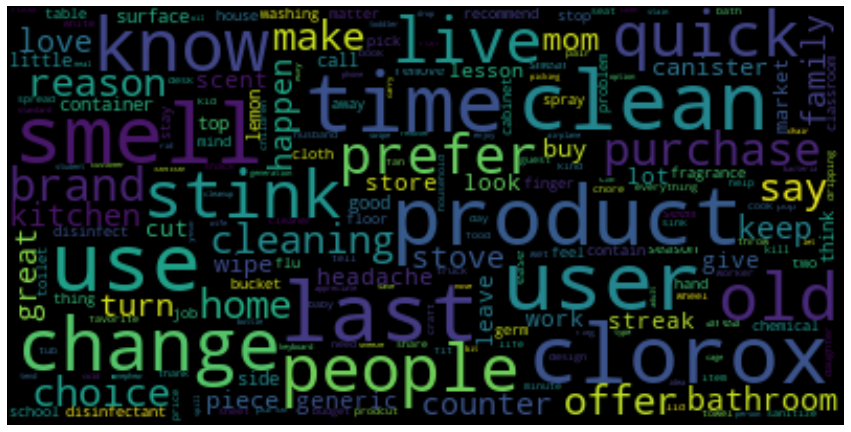

In [ ]:
# Get wordcloud for most reviewed product

drawWordCloud(top_tokens)

**Observations**

Some very commonly used words are **smell, product, clean, quick, time** etc. which depict the sentiment of the user towards that product. It also signifies the qualities.

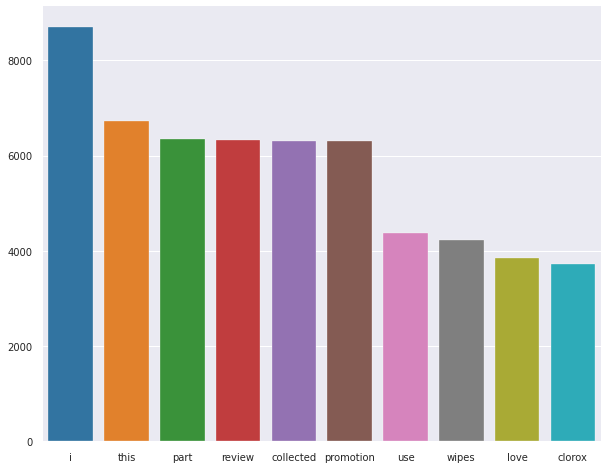

In [ ]:
plotTopTokens(top_tokens)

We would need to clean the text to remove some irrelevant terms like `i`, `this` which are not adding any value to the sentiment.

Let's try to analyze some negative sentiments and try to see what are the most commonly occuring terms while giving a negative review.

**Bad Reviews(1-2) rating and negative overall sentiment**

In [ ]:
# Getting bad ratings and negative sentiments

bad_reviews = df[((df['reviews_rating'] < 3) & (df['user_sentiment']=='Negative'))]

bad_reviews

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-01T00:00:00.000Z,False,False,2,I received this product from influenster in ex...,Not worth the hype,NaN,NaN,mandysmith1122,Negative
28864,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-01T15:53:57.000Z,NaN,NaN,2,I received this product from influenster in ex...,Not Worth The Hype,Kenosha,NaN,mandysmith1122,Negative
28868,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-02-01T19:54:13.000Z,NaN,NaN,2,I felt like this conditioner weighed by hair d...,Ehhhh,Sunnyvale,CA,ericamarchelle,Negative
28874,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-16T00:00:00.000Z,False,False,2,I purchased this line because it claimed to he...,Not Moisturizing,NaN,NaN,wendy2245,Negative


In [ ]:
# let's get the tokens for negative reviews
bad_review_tokens = filterStopWords(bad_reviews['reviews_text'])

bad_review_tokens[1]

['My',
 'husband',
 'bought',
 'gel',
 'us',
 'The',
 'gel',
 'caused',
 'irritation',
 'felt',
 'like',
 'burning',
 'skin',
 'I',
 'recommend',
 'gel']

Total number of words: 2903


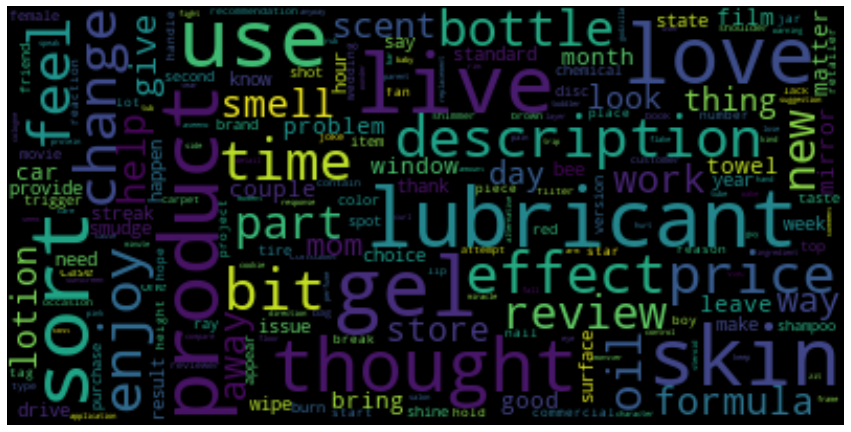

In [ ]:
# draw negative review wordcloud
drawWordCloud(bad_review_tokens)

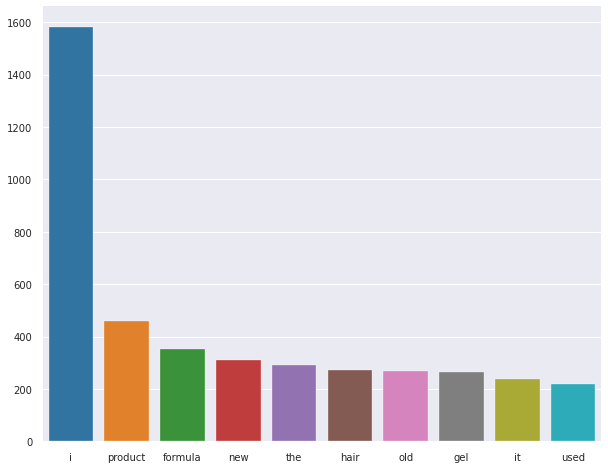

In [ ]:
# Plotting 10 most common bad review comment tokens
plotTopTokens(bad_review_tokens)

**Observation**

In negative reviews mostly the reviewers are complaining and talking about **formula, stink, price, old(might be old version)** as it is evident from the word cloud and the graph.


Let's try to observe rating vs sentiment.

#### **reviews_rating vs user_sentiment**


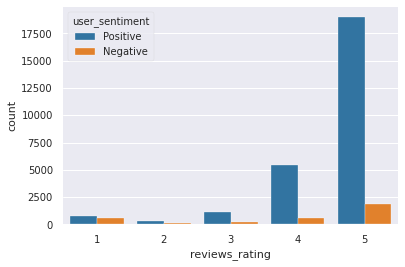

In [ ]:
sns.countplot(data = df, x='reviews_rating', hue='user_sentiment')

**Observations**

The above plot shows that as the rating increase the ratio of positive to negative sentiments increases. For `ratings < 3`, the difference between postive and negative is quite less, while for `rating>=3`, the difference widens. 

Let's now try to create a new feature **reviews length** and try to see if we have any relation with **reviews_rating**.

#### **Review Length**


In [ ]:
# Get review length and plot
rl_df = pd.DataFrame(columns=['reviews_length', 'reviews_rating'])

rl_df['reviews_length'] = df['reviews_text'].apply(lambda x: len(x.split()))
rl_df['reviews_rating'] = df['reviews_rating']

rl_df.describe()

,reviews_length,reviews_rating
count,30000.000000,30000.000000
mean,34.385800,4.483133
std,34.556643,0.988441
min,1.000000,1.000000
25%,16.000000,4.000000
50%,25.000000,5.000000
75%,41.000000,5.000000
max,1010.000000,5.000000


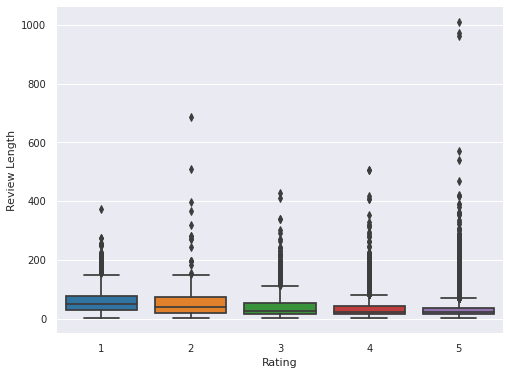

In [ ]:
# Plot distribution of review length for ratings
plt.figure(figsize = (8,6))
sns.boxplot(x='reviews_rating', y='reviews_length', data=rl_df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

There are a lot of outliers due to which the distribution is not visualizable. Let's try without outliers plotting.

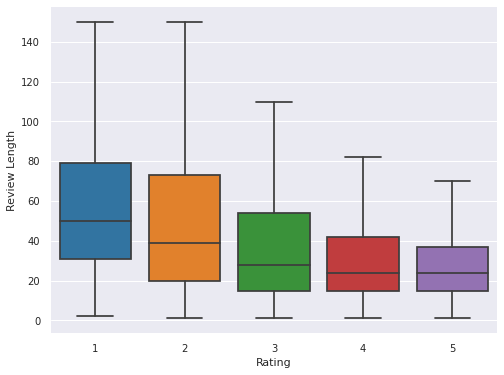

In [ ]:
# plotting distribution without outliers

# Plot distribution of review length for ratings
plt.figure(figsize = (8,6))
sns.boxplot(x='reviews_rating', y='reviews_length', data=rl_df, showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

In [ ]:
# Let's check correlation between them
rl_df.corr()

,reviews_length,reviews_rating
reviews_length,1.000000,-0.197829
reviews_rating,-0.197829,1.000000


**Observations**

The above box-plot gives us a clear pattern that lower ratings are having large length of review comments. While good ratings contain a few words. However, the correlation shows a very less negative correlation between them.

**Reviews Recommend**

Let's try to see how many reviews recommended are not telling similar sentiment


In [ ]:
opposite_sentiment = df[((df['user_sentiment']=='Negative') & df['reviews_doRecommend']) | ((df['user_sentiment']=='Positive') & (df['reviews_doRecommend']== False))]

len(opposite_sentiment)*100/len(df)

11.253333333333334

In [ ]:
opposite_sentiment[opposite_sentiment['reviews_doRecommend']]['reviews_text'][42]

"You would think it's convenient to have bubble bath and wash in the same container, but it just means you buy twice the amount... My son loves the bubbles though so no complaints."

**Observation**

There are `11.25%` records where the user is recommending the opposite of what the review sentiment is. This is something weird and very important. We should handle the scenario where the product is not recommended but the review sentiment is shown as positive.

Based on the above EDA, we got few action points to do in the data cleaning and text preprocessing steps. Let's move forward with the next steps.

### **Data Cleaning**

Let's start by handling missing values.

**Missing Value Handling**

As city and province have large amount of missing values `93.6%` and `99.4%` respectively, it would be better deleting these columns as they won't help in any analysis. Also, didPurchased also has `46.9%` missing values. So, instead of imputing and adding a bias it is better to remove this column.

In [7]:
df.drop(columns = ['reviews_didPurchase', 'reviews_userCity', 'reviews_userProvince'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_doRecommend  27430 non-null  object
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_title        29810 non-null  object
 10  reviews_username     29937 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB


The `reviews_date` column can be removed as from EDA it is not a deciding featuring in any recommendation/sentiment.

In [9]:
df.drop(columns = ['reviews_date'], inplace=True)

Let's combine the title and text column so as to combine the reviews related text and ease out the NLP process on single column.


In [10]:
#Combine text and title
df['reviews_text'] = df[['reviews_title', 'reviews_text']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)

df.drop(columns='reviews_title', inplace=True)

In [11]:
df.isnull().sum()

id                        0
brand                     0
categories                0
manufacturer            141
name                      0
reviews_doRecommend    2570
reviews_rating            0
reviews_text              0
reviews_username         63
user_sentiment            1
dtype: int64

We can ignore the missing values in `reviews_username` as it is only needed for recommendation system and there we can fillna with a default value.

We can remove `brand`, `categories`, `manufacturer` and `reviews_doRecommend` columns from the dataframe as we won't be using them in our models.

In [12]:
df.drop(columns=['brand', 'categories', 'manufacturer', 'reviews_doRecommend'], inplace=True)

In [13]:
df.isnull().sum()

id                   0
name                 0
reviews_rating       0
reviews_text         0
reviews_username    63
user_sentiment       1
dtype: int64

We would be removing the record where the user sentiment is not present, as we won't be able to use it for model building without knowning the output class. As it is a single record, it won't make difference in the amount of data.

In [14]:
df = df[~df['user_sentiment'].isnull()]

df.isnull().sum()

id                   0
name                 0
reviews_rating       0
reviews_text         0
reviews_username    63
user_sentiment       0
dtype: int64

### **Text Preprocessing**

Let's move ahead with the text preprocessing steps. As we seen in EDA that the text column contains various types of characters like numeric, special characters, so we would need to perform pre-processing before we can use them for feature extraction. Some of the steps that can be performed are as follows:

*   emoji removal
*   punctuation removal
*   stripping URLs
*   stopwords removal
*   stemming/lemmatization
*   lower case conversion
*   spell check
*   unigrams


We would start by creating some utility methods and using them...

In [15]:
import re, string, unicodedata
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import word_tokenize, sent_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# reference of map - github repositoy
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Method to remove emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


# Method to parse html links to text
def parse_html(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    return re.sub('\[[^]]*\]', '', text)


# Define function to expand contractions
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                        if CONTRACTION_MAP.get(match)\
                        else CONTRACTION_MAP.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


# Convert to lower case
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove non-ASCII characters
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


# replace numbers to text form
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words


#Remove punctuation and special characters
def remove_punctuation_and_splchars(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words


stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


# Remove stop words
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

# stemmer
def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems


# Convert post_tag to wordnet understandable code
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.VERB


# lemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    pos_tagged_words = nltk.pos_tag(words)
    for word in pos_tagged_words:
        # print(word[1])
        lemma = lemmatizer.lemmatize(word[0], pos=pos_tagger(word[1]))
        lemmas.append(lemma)
    return lemmas


# combined method to normalize text
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Let's define one more method to combine all the text processing steps...

In [16]:
# Text preprocessing
def normalize_and_lemmatize(text):
    sample = parse_html(text)
    sample = remove_emoji(sample)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [17]:
df['clean_text'] = df['reviews_text'].map(lambda x: normalize_and_lemmatize(x))

In [18]:
df['clean_text'][:10]

0    awesome love album good hip hop side current p...
1       good good flavor review collect part promotion
2                                     good good flavor
3    disappoint read review look buy one couple lub...
4    irritation husband buy gel us gel caused irrit...
5    not worth boyfriend bought spice thing bedroom...
6    disappoint buy earlier today excite check base...
7    not happy buy product husband try not impresse...
8    disappointing husband buy extra fun werevboth ...
9    not buy get surprise husband nothing special l...
Name: clean_text, dtype: object

In [19]:
# Drop the raw text field
df.drop(columns='reviews_text', inplace=True)

In [ ]:
# Let's remove the variables of EDA as we don't need them further
del top_product
del top_tokens
del bad_reviews
del bad_review_tokens
del opposite_sentiment

import gc

collected = gc.collect()

In [37]:
# Libraries for Feature selection & model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
from gensim.models import word2vec
from imblearn.over_sampling import SMOTE
from collections import Counter

### **Feature Selection**

In order to train our model, we need to convert for review text field to numerical features so that it can be used by model to work and find patterns in data. For this, let's we would try out ***Bag of words, Tf-Idf vectorizer, and word embedding***.


**Separting train and response features & splitting Dataset into Train and Test Set**

We would split our data into train to build the model and test set to evaluate the model.

In [22]:
# Separate train and response variable
sent_y = df['user_sentiment'].apply(lambda x: 0 if x == 'Negative' else 1)
sent_X = df['clean_text']

In [23]:
# Splitting in train and test split
XS_train, XS_test, ys_train, ys_test = train_test_split(sent_X, sent_y, test_size=0.3, random_state=101)

In [24]:
print('Train size', XS_train.shape)
print('Test size', XS_test.shape)

Train size (20999,)
Test size (9000,)


Let's try out various models with all types of features selection techniques and choose the best one....

### **Modelling** 

For sentimental analysis, we would try out models like *Logistic regression, Random Forest, Naive Bayes* and try out all permutations with various feature engineering techniques and hyper parameter tuning.

**Evaluation Metric**

Before starting modelling, we would like to call out that as we have huge imbalance of class in our dataset, we would try out `SMOTE` as well and as mainly the minority class should be considered for evaluating we should use `precision` and `recall`. For this let's try to use `f1_score` with is harmonic mean of `precision` and `recall` along with `confusion matrix`.

Let's define a common method for model building...

In [25]:
# Common method for modelling
def modelling(Model, Xtrain, Xtest, ytrain = ys_train):
    model = Model
    # Fit
    model.fit(Xtrain, ytrain)
    
    global y_pred
    # Predict
    y_pred = model.predict(Xtest)
    
    # f1-score
    score = f1_score(ys_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score:", score)

# Method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    plt.figure(figsize=(8,6))
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


#### **1. CountVectorizer**

Let's start with count vectorizer and try to analyze various models.

In [26]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect.fit(XS_train)
count_vect_train = count_vect.transform(XS_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(XS_test)
count_vect_test = count_vect_test.toarray()

In [26]:
# vocabulary size
print('Vocabulary size :', len(count_vect.get_feature_names()))

Vocabulary size : 15302


##### **1.1 Logistic Regression with CountVectorizer**

In [ ]:
# model logistic regression with countvectorizer and print f1 score
modelling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', random_state = 101), count_vect_train, count_vect_test)

f1 score: 0.8965651558017523


              precision    recall  f1-score   support

           0       0.49      0.77      0.60       986
           1       0.97      0.90      0.93      8014

    accuracy                           0.89      9000
   macro avg       0.73      0.83      0.76      9000
weighted avg       0.92      0.89      0.90      9000



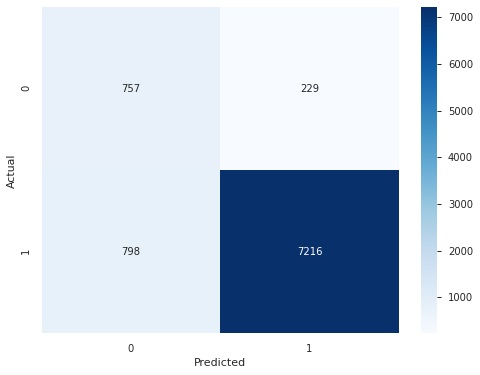

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

##### **1.2 Random Forest with CountVectorizer**

In [ ]:
# model random forest with countvectorizer and print f1 score
modelling(RandomForestClassifier(n_estimators = 200, random_state = 101), count_vect_train, count_vect_test)

f1 score: 0.8841620169526048


              precision    recall  f1-score   support

           0       0.91      0.20      0.33       986
           1       0.91      1.00      0.95      8014

    accuracy                           0.91      9000
   macro avg       0.91      0.60      0.64      9000
weighted avg       0.91      0.91      0.88      9000



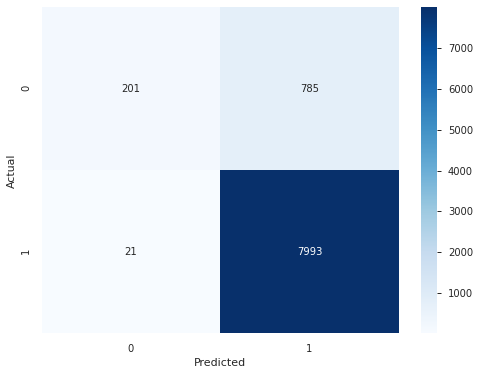

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

##### **1.3 Naive Bayes with CountVectorizer**

In [ ]:
# model naive bayes with countvectorizer and print f1 score
modelling(MultinomialNB(), count_vect_train, count_vect_test)

f1 score: 0.8724934121271418


              precision    recall  f1-score   support

           0       0.49      0.24      0.33       986
           1       0.91      0.97      0.94      8014

    accuracy                           0.89      9000
   macro avg       0.70      0.61      0.63      9000
weighted avg       0.87      0.89      0.87      9000



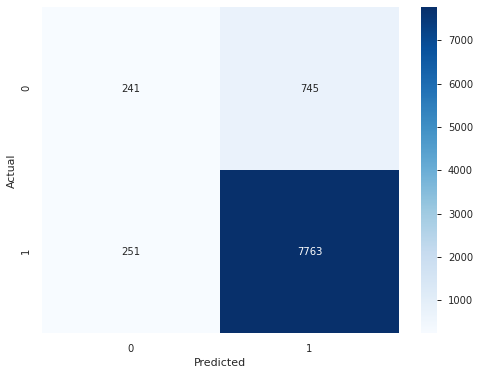

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

**Observations**

Overall, `Random forest`, `Logistic Regression` are giving fairly better precision, recall and overall f1-score. However, `RF` overpowers `LR` by providing a little egde for recall and overall `f1-score`.

#### **2. TF-IDF**

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

In [ ]:
# Word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(XS_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(XS_test)
tfidf_vect_test = tfidf_vect_test.toarray()

##### **2.1 Logistic Regression with TF-IDF Vectorizer**

In [ ]:
# model logistic regression with TF-IDF Vectorizer and print f1 score
modelling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', random_state = 101), tfidf_vect_train, tfidf_vect_test)

f1 score: 0.8807415221042615


              precision    recall  f1-score   support

           0       0.44      0.79      0.56       986
           1       0.97      0.87      0.92      8014

    accuracy                           0.86      9000
   macro avg       0.70      0.83      0.74      9000
weighted avg       0.91      0.86      0.88      9000



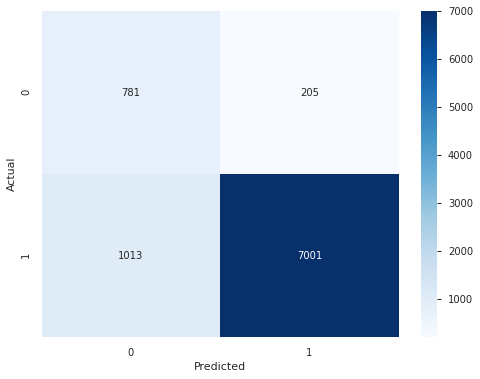

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

##### **2.2 Random Forest with TF-IDF Vectorizer**

In [ ]:
# model Random Forest with TF-IDF Vectorizer and print f1 score
modelling(RandomForestClassifier(n_estimators = 200, random_state = 101), tfidf_vect_train, tfidf_vect_test)

f1 score: 0.8782019465003117


              precision    recall  f1-score   support

           0       0.91      0.17      0.29       986
           1       0.91      1.00      0.95      8014

    accuracy                           0.91      9000
   macro avg       0.91      0.59      0.62      9000
weighted avg       0.91      0.91      0.88      9000



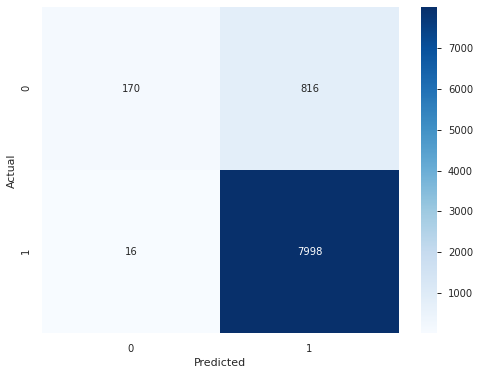

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

##### **2.3 Naive Bayes with TF-IDF Vectorizer**

In [ ]:
# model Naive Bayes with TF-IDF Vectorizer and print f1 score
modelling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

f1 score: 0.8390012658396636


              precision    recall  f1-score   support

           0       0.33      0.00      0.00       986
           1       0.89      1.00      0.94      8014

    accuracy                           0.89      9000
   macro avg       0.61      0.50      0.47      9000
weighted avg       0.83      0.89      0.84      9000



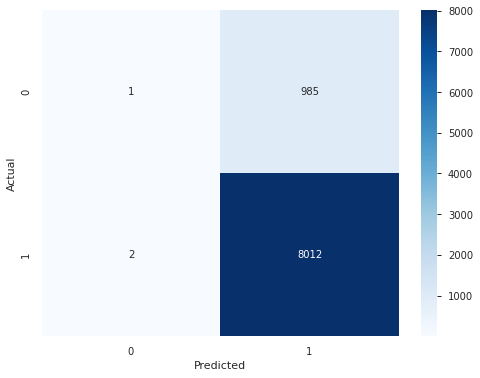

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

#### **3. Word Embeddings**

 We have two options here:
 
1. Use pre-trained word vectors (Glove)

2. Train our own vectors

Let's try to use the second approach and train our own word-to-vector...

We would use skip gram as 1, window as 2 with length of the word embedding based on EDA as 100. For training we would use `nltk product_review_1` corpus to train the word vector. Skipgram would allow for long sentence context matching between words of a sentence.

In [ ]:
# skip gram appproach
sen_X_tokens = [sent.split() for sent in XS_train]
sen_Xtest_tokens = [sent.split() for sent in XS_test]
w2v = word2vec.Word2Vec(sen_X_tokens, window=2, min_count=2, sg = 1, size=100)

In [ ]:
w2v.most_similar('fantastic', topn=5)

[('amazing', 0.9080605506896973),
 ('great', 0.9047267436981201),
 ('outstanding', 0.8983964920043945),
 ('incredible', 0.8983308672904968),
 ('awesome', 0.8889949321746826)]

Let's create a method to convert sentence to word vectors...

In [ ]:
# Method to convert sentence -> word vector
def sent_vec_w2v(sent):
    wv_res = np.zeros(w2v.vector_size)
    ctr = 1
    for w in sent:
        if w in w2v:
            ctr += 1
            wv_res += w2v[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:
train_doc_vecs = [] #train
for doc in sen_X_tokens:    
    doc_words = [term for term in doc]
    train_doc_vecs.append(sent_vec_w2v(doc_words))

test_doc_vecs = [] #test
for doc in sen_Xtest_tokens:    
    doc_words = [term for term in doc]
    test_doc_vecs.append(sent_vec_w2v(doc_words))

##### **3.1 Logistic Regression with Word embedding**

In [ ]:
# model Logistic Regression with Word embedding and print f1 score
modelling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, random_state = 101), train_doc_vecs, test_doc_vecs)

f1 score: 0.7818568667137726


              precision    recall  f1-score   support

           0       0.26      0.77      0.39       986
           1       0.96      0.73      0.83      8014

    accuracy                           0.73      9000
   macro avg       0.61      0.75      0.61      9000
weighted avg       0.89      0.73      0.78      9000



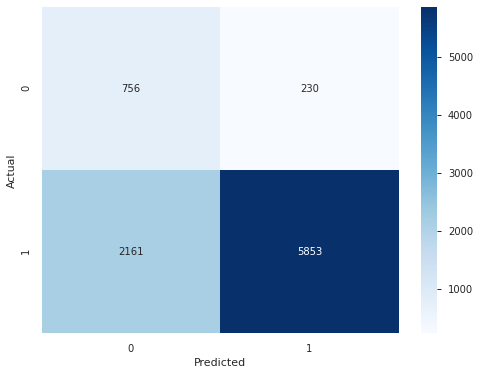

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

##### **3.2 Random Forest with Word embedding**

In [ ]:
# model Random Forest with word embedding and print f1 score
modelling(RandomForestClassifier(n_estimators = 200, random_state = 101), train_doc_vecs, test_doc_vecs)

f1 score: 0.8794329414067913


              precision    recall  f1-score   support

           0       0.82      0.19      0.31       986
           1       0.91      0.99      0.95      8014

    accuracy                           0.91      9000
   macro avg       0.86      0.59      0.63      9000
weighted avg       0.90      0.91      0.88      9000



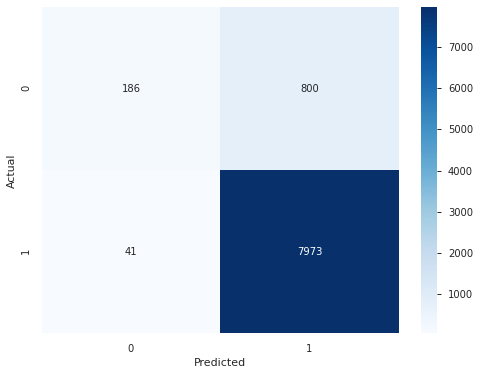

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

##### **3.3 Naive Bayes with Word embedding**

In [ ]:
# model Naive Bayes with word embedding and print f1 score
modelling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

f1 score: 0.8390012658396636


              precision    recall  f1-score   support

           0       0.33      0.00      0.00       986
           1       0.89      1.00      0.94      8014

    accuracy                           0.89      9000
   macro avg       0.61      0.50      0.47      9000
weighted avg       0.83      0.89      0.84      9000



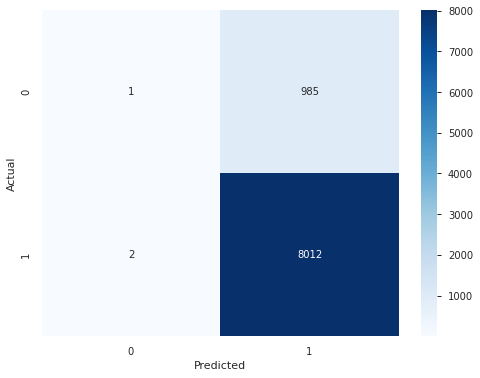

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

**Observations**

Overall, we can observe that `Logistic Regression` along with `Count Vectorizer` is performing well then other combinations at `~89%` f1-score and individual recall and precision also far better than others for both minority and majority class.

For our scenario let's use `Word Embedding` along with `RandomForestClassifier`.

Let's try to perform imbalance class handling... 

In [ ]:
counter = Counter(ys_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
XS_train_sm, ys_train_sm = smt.fit_resample(train_doc_vecs, ys_train)

counter = Counter(ys_train_sm)
print('After',counter)

Before Counter({1: 18618, 0: 2381})
After Counter({1: 18618, 0: 18618})


#### **Balanced Dataset Using SMOTE**

##### **4.1 Logistic Regression with OverSampled DataSet**

Let's try to see if any of the measures increase if we handle imbalance class problem using SMOTE.

In [ ]:
# model Logistic Regression with Word embedding and print f1 score
modelling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 101), XS_train_sm, test_doc_vecs, ys_train_sm)

f1 score: 0.8040812146861194


              precision    recall  f1-score   support

           0       0.29      0.77      0.42       986
           1       0.96      0.76      0.85      8014

    accuracy                           0.76      9000
   macro avg       0.63      0.77      0.63      9000
weighted avg       0.89      0.76      0.80      9000



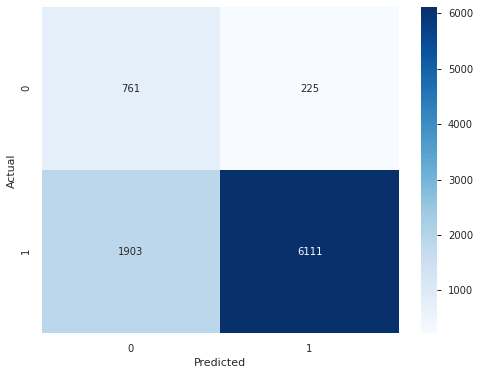

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

##### **4.2 Random Forest with OverSampled DataSet**

In [ ]:
# model Random Forest with word embedding and print f1 score
modelling(RandomForestClassifier(n_estimators = 200, random_state = 101), XS_train_sm, test_doc_vecs, ytrain=ys_train_sm)

f1 score: 0.8841439769244481


              precision    recall  f1-score   support

           0       0.48      0.45      0.46       986
           1       0.93      0.94      0.94      8014

    accuracy                           0.89      9000
   macro avg       0.70      0.69      0.70      9000
weighted avg       0.88      0.89      0.88      9000



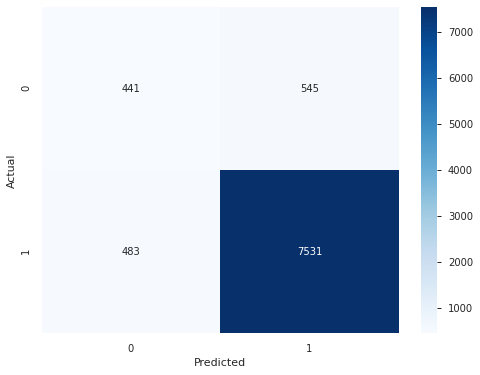

In [ ]:
# Print the classification report
print(classification_report(ys_test, y_pred))
plot_confusion_matrix(ys_test, y_pred)

Very minute increase in the overall f1-score for Random Forest.
While macro average increased a bit. For LR and NB, the overall f1-scored. This might be due to that fact that NB was not handling the minority class well without SMOTE and was blindfoldedly giving majority class, thus leading to low precision and recall for minority class.

Let's move forward with Logistic Regression with Count Vectorizer and try do hyper parameter tuning for the above, we could do for others as well but due to computional power constraint limiting to `LR` with `CV`.



In [ ]:
#For memory optimization, we would delete the word vectors apart from count vectorizers and perform gc
del tfidf_vect
del tfidf_vect_test
del tfidf_vect_train
del train_doc_vecs
del test_doc_vecs
del sen_X_tokens
del sen_Xtest_tokens
del w2v
del XS_train_sm
del ys_train_sm

import gc

collected = gc.collect()
collected

40986


#### **Hyper-Parameter Tuning**

In [ ]:
# GridSearchCV to find optimal parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 3

In [ ]:
# Create the parameter grid for LR
param_grid = {
    'C': [0.01, 0.1, 1, 5],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'saga']
}

# Create a basedmodel
lr = LogisticRegression(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring='f1_weighted')

In [ ]:
# Fit grid search on training dataset
grid_search.fit(count_vect_train, ys_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 126.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 5], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=1)

In [ ]:
# print the optimal accuracy score and hyperparameters
print('We can get f1-score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get f1-score of 0.8939632978469328 using {'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}


Now we have got the best parameters for Logistic Regression with using GridSearchCV. Although, it seems like the percentage is comparable to the existing one itself.

Let's try to build the final model using these tuned parameters.

In [27]:
# Final model for sentimental analysis
final_model = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     penalty = 'l2', class_weight = 'balanced', random_state = 101)

In [28]:
# Fit the model
final_model.fit(count_vect_train, ys_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=101, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

##### Threshold Selection

Let's now try to plot the ROC curve and see which threshold works best.

**Plotting ROC**

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [30]:
#Method to plot ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

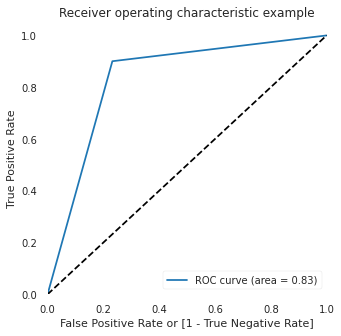

In [38]:
# draw ROC
draw_roc(ys_test, final_model.predict(count_vect_test))

**Observations**

This curve looks acceptable with `AOC = 0.83`, which means the model is good...

In [44]:
import pickle

# Method to save model
def save_obj(obj, name):
    with open('deployment/model/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [46]:
# Save final model
save_obj(final_model, 'sentimental_model')

In [37]:
# Save CountVectorizer
save_obj(count_vect, 'count_vect')

In [47]:
# load the model from disk
loaded_model = pickle.load(open('deployment/model/sentimental_model.pkl', 'rb'))

#Predict on test set
y_pred_md = loaded_model.predict(count_vect_test)

#Print f score on test
print(f1_score(ys_test, y_pred_md,average = 'weighted'))

0.8965651558017523


So we have our sentimental analysis model ready. Before moving on to the recommendation system part, let's free the memory from count vectorizer.

In [ ]:
#Delete big count vectors
del count_vect
del count_vect_train
del count_vect_test

import gc

collected = gc.collect()

## **2. Recommendation Engine**

The following types of recommendation systems can be used in this use-case:

1. User-based recommendation system
2. Item-based recommendation system
 
Task is to analyze the recommendation systems and select the one that is best suited in this case.

Once we get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings. `reviews_username` (one of the columns in the dataset) to identify your user. 

To evaluate our engine, we would use `RMSE - Root Mean Squared Error` and `R2 Score`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29999 non-null  object
 1   name              29999 non-null  object
 2   reviews_rating    29999 non-null  int64 
 3   reviews_username  29936 non-null  object
 4   user_sentiment    29999 non-null  object
 5   clean_text        29999 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


### **Train-Test Split**

In [ ]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30, random_state=31)

In [ ]:
print('Train:', train.shape)
print('Test:', test.shape)

Train: (20999, 6)
Test: (9000, 6)


### **User Based Recommendation**

In [ ]:
# Pivot the train dataset into matrix format in which columns are product IDs and the rows are user IDs.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,...,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observations**

We can see that there are 251 columns meaning products. So, in training there are 21 products which doesn't even come up due to train test split.

#### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the product which has not been rated by the user. To ignore the products rated by the user, we will mark it as `0` during prediction. The product not rated by user is marked as `1` for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as `1`. This is just opposite of `dummy_train`.

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [ ]:
dummy_train.head()

,id,name,reviews_rating,reviews_username,user_sentiment,clean_text
16284,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",5,anonymousgirl,Positive,versatile choice lip shimmer different color n...
26217,AVpfPkrkilAPnD_xX-L9,"Finish Gelpacs Dishwasher Detergent, Orange Sc...",5,cygnusx1,Negative,product work dish hard water not leave residue...
10268,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,sonya1974,Negative,clorox wipe cant imagine life without clorox p...
17841,AVpfBU2S1cnluZ0-cJsO,Power Crunch Protein Energy Bar Peanut Butter ...,5,thunderhawks,Positive,delicious something taste good affordable grea...
4535,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),1,allylapew,Positive,great videos together one box great movie one ...


In [ ]:
# The product not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x >= 1 else 1)

#### User-based Similarity Recommendation

In [ ]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [ ]:
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,...,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

For our scenario, let's calculate adjusted cosine similarity. Let's ignore NAN values for our similarity matrix.

#### Adjusted Cosine Similarity


In [ ]:
# Calculate and normalize ratings
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,...,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,...,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936,-0.015936
00sab00,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,0.996016,-0.003984,-0.003984,-0.003984,-0.003984,...,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984,-0.003984
02dakota,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,...,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,-0.019920,

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0

user_correlation

array([[ 1.   , -0.004, -0.004, ..., -0.004, -0.004, -0.004],
       [-0.004,  1.   , -0.004, ..., -0.004, -0.004, -0.004],
       [-0.004, -0.004,  1.   , ..., -0.004, -0.004, -0.004],
       ...,
       [-0.004, -0.004, -0.004, ...,  1.   ,  1.   , -0.004],
       [-0.004, -0.004, -0.004, ...,  1.   ,  1.   , -0.004],
       [-0.004, -0.004, -0.004, ..., -0.004, -0.004,  1.   ]])

In [ ]:
user_correlation.shape

(18255, 18255)

#### Prediction

Let's try to predict user ratings for users based on similar users and try to match the most similar ones. For this, we can consider negative similarity as 0.

In [ ]:
# Mark negative correlation to 0
user_correlation[user_correlation < 0] = 0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Predict
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.69870001, ..., 1.14825271, 0.        ,
        0.        ],
       [0.        , 0.        , 4.95266702, ..., 1.36628747, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.42655414, ..., 3.52845575, 0.        ,
        0.        ],
       [0.        , 0.        , 0.42655414, ..., 3.52845575, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.45350137, 0.        ,
        0.69870001]])

In [ ]:
user_predicted_ratings.shape

(18255, 251)

Since we are predicting on the products which are not reviewed by user, let's remove other ratings by multiplying with `dummy_train`

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,...,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,1.797210,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,4.045063,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.119573,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
00sab00,0.0,0.0,0.698700,11.846886,0.0,0.0,0.0,0.000000,1.273487,0.000000,0.0,0.0,0.0,0.0,0.0,3.373931,1.233128,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.606876,0.0,8.937315,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.635601,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.453790,2.183991,0.0,0.0,0.980551,0.0,0.0,0.0,0.000000,3.381968,2.382114,0.000000,0.0,0.0,0.0000,0.000000,0.518514,0.0,0.000000,1.148253,0.000000,1.148253,0.0,0.0
02dakota,0.0,0.0,4.952667,24.256800,0.0,0.0,0.0,0.000000,0.000000,2.108481,0.0,0.0,0.0,0.0,0.0,3.438884,1.298080,1.760511,3.11394,0.000000,3.067238,3.119573,0.0,8.004982,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,22.452668,0.0,0.0,0.0,88.706459,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.635601,0.0,0.0,0.0,0.0,0.0,1.682881,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.015058,0.0,0.0,3.119573,0.0,0.0,0.0,4.098101,5.605942,0.934389,0.000000,0.0,0.0,1.6989,4.313967,0.000000,0.0,1.613146,1.366287,0.000000,1.366287,0.0,0.0
02deuce,0.0,0.0,4.952667,24.256800,0.0,0.0,0.0,0.000000,0.000000,2.108481,0.0,0.0,0.0,0.0,0.0,3.438884,1.298080,1.760511,3.11394,0.000000,3.067238,3.119573,0.0,8.004982,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,22.452668,0.0,0.0,0.0,88.706459,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.635601,0.0,0.0,0.0,0.0,0.0,1.682881,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.015058,0.0,0.0,3.119573,0.0,0.0,0.0,4.098101,5.605942,0.934389,0.000000,0.0,0.0,1.6989,4.313967,0.000000,0.0,1.613146,1.366287,0.000000,1.366287,0.0,0.0
0325home,0.0,0.0,0.426554,13.678186,0.0,0.0,0.0,3.119573,3.528456,0.000000,0.0,0.0,0.0,0.0,0.0,1.463413,2.162113,0.000000,0.00000,0.980551,0.000000,0.000000,0.0,12.309255,0.0,0.0,0.0,0.0,0.0,3.528456,0.0,4.851198,0.0,0.0,0.0,23.441703,0.0,0.0,0.0,0.0

Let's try to predict the top 20 products for `02deuce`

In [ ]:
prediction = user_final_rating.loc['02deuce'].sort_values(ascending=False)[0:20]
prediction

id
AVpfRTh1ilAPnD_xYic2    117.374620
AVpf0eb2LJeJML43EVSt    104.389064
AVpe41TqilAPnD_xQH3d     88.706459
AVpe59io1cnluZ0-ZgDU     73.017710
AVpf2tw1ilAPnD_xjflC     70.862604
AVpf3VOfilAPnD_xjpun     46.601831
AVpfD9xTLJeJML431ig2     25.122648
AVpfPnrU1cnluZ0-g9rL     24.439904
AV1YGDqsGV-KLJ3adc-O     24.256800
AVpe31o71cnluZ0-YrSD     22.452668
AVpfM_ytilAPnD_xXIJb     21.192620
AVpf5olc1cnluZ0-tPrO     20.609691
AVpf0thK1cnluZ0-r8vR     18.489487
AVpfR5m0LJeJML436K3W     17.757875
AVpfBrUZilAPnD_xTUly     16.747894
AVpe9W4D1cnluZ0-avf0     15.183453
AVpfJP1C1cnluZ0-e3Xy     14.160550
AVpfN6Z71cnluZ0-gZmO     13.483055
AVpe8gsILJeJML43y6Ed     12.941517
AVpf--o9LJeJML43G_Fq     11.795128
Name: 02deuce, dtype: float64

In [ ]:
# Dataframe containing product Id to product Name
products = pd.DataFrame(df.groupby('id')['name'], columns=['id', 'name'])

In [ ]:
# Merging product name with product ID
prediction = pd.merge(prediction, products, left_on='id',right_on='id', how = 'left')
prediction['name'][:5]

0    27222    Planes: Fire Rescue (2 Discs) (includ...
1    4531    The Resident Evil Collection 5 Discs (...
2    1796    Mike Dave Need Wedding Dates (dvd + Di...
3    2583    My Big Fat Greek Wedding 2 (blu-Ray + ...
4    5591    Red (special Edition) (dvdvideo)
5592 ...
Name: name, dtype: object

**Observations**

As per our prediction this user is interested in DVDs as all the recommendations are of DVDs. Let's try to evaluate our user similarity correlation and see how efficient it is.

In [ ]:
prediction[:5]

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,117.374620,27222 Planes: Fire Rescue (2 Discs) (includ...
1,AVpf0eb2LJeJML43EVSt,104.389064,4531 The Resident Evil Collection 5 Discs (...
2,AVpe41TqilAPnD_xQH3d,88.706459,1796 Mike Dave Need Wedding Dates (dvd + Di...
3,AVpe59io1cnluZ0-ZgDU,73.017710,2583 My Big Fat Greek Wedding 2 (blu-Ray + ...
4,AVpf2tw1ilAPnD_xjflC,70.862604,5591 Red (special Edition) (dvdvideo) 5592 ...


#### Evaluation - User--User Similarity

For evaluating we would perform the similar steps as in the above prediction;however we would try to predict on only those products for which the user has already given a ratings, so that we can compare the predicted and actual rating.

In [ ]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
print('Shape:', common.shape)
common.head()

Shape: (2023, 6)


,id,name,reviews_rating,reviews_username,user_sentiment,clean_text
20458,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,cleansmells,Positive,work great shower product wonderful shower sin...
28827,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,1,kelly4729,Positive,not hydrate not not like product receive influ...
9617,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,earreaga,Positive,overall grat product love wipe use house smell...
9986,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ncmom2224,Positive,love wipe love ease use wipe clean well nice s...
27636,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,raymond,Positive,fun movie message much interesting movie plane...


In [ ]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,...,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRoqcLJeJML436FqG,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfshNsLJeJML43CB8q,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4djs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18215,18216,18217,18218,18219,18220,18221,18222,18223,18224,18225,18226,18227,18228,18229,18230,18231,18232,18233,18234,18235,18236,18237,18238,18239,18240,18241,18242,18243,18244,18245,18246,18247,18248,18249,18250,18251,18252,18253,18254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.779893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.705691,1.0,0.465343,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.705691,1.0,0.465343,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.705691,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18251,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18252,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18253,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
# Set the index for user_correlation as username 
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)

user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18215,18216,18217,18218,18219,18220,18221,18222,18223,18224,18225,18226,18227,18228,18229,18230,18231,18232,18233,18234,18235,18236,18237,18238,18239,18240,18241,18242,18243,18244,18245,18246,18247,18248,18249,18250,18251,18252,18253,18254
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.779893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.705691,1.0,0.465343,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.705691,1.0,0.465343,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
# Set the column for user_correlation as id 
user_correlation_df.columns = df_subtracted.index.tolist()

#Filter only common user values for user_correlation
list_name = common.reviews_username.tolist()
user_correlation_df =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
user_correlation_df.shape

(1691, 18255)

In [ ]:
#Filter based on username
user_correlation_df = user_correlation_df.T[user_correlation_df.T.index.isin(list_name)]

In [ ]:
user_correlation_df = user_correlation_df.T

In [ ]:
print(user_correlation_df.shape)
user_correlation_df.head()

(1691, 1691)


,00sab00,123charlie,1943,4djs,50cal,7inthenest,85lisa,aalyah,aaron,abbey,abby,abc,abcdef,abcgator,abigail,abismomy,acellacey,acg1,acjuarez08,actionaction,adam,adizzione,adma2,adriana9999,afwifey2003,agmt,aisha,aj,aj1135,ajackson75,ajay,ajcrossover11,ajune,akesler19,akhan,akporter84,alena125,alex,alexa86,alexis,...,viewer,viking80,vikki,vivi37,vivian,vivienne,vkay,vreal88,wally,wasabi42,watson28,weewee,wendy,wendy59,wendydarling,wernigcourtney,whythis,willy,wizard,wolf,wolverine,woohoo,woottos,woowoo,workingmomof1,worm,wowwie,wren113,xcoupon,xmom,yayawomack,yellow,yeyo,ygtz,yohnie1,yshan,yucky111,yummy,zapman,zmom
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489374,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.409353,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.534256,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.705691,0.0,0.000000,0.0,0.0,0.0,0.0,0.594317,0.0,0.000000,...,0.51197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.705691,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.705691,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.705691,1.0,0.0,0.0,0.0,0.705691,1.0,0.000000,0.0,0.705691,1.0,0.0,0.0,0.0,0.000000,0.0,0.521375,...,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we have a square matrix. Let's set the negative correlation to zero as we are not interested in dissimilarity index. We only want to calculate the most similar items.

In [ ]:
# Set negative correlation to 0
user_correlation_df[user_correlation_df < 0] = 0

common_user_predicted_ratings = np.dot(user_correlation_df, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  4.23701551,
         2.24442428,  0.        ],
       [ 0.        ,  3.29400415,  0.        , ...,  2.63778108,
         0.        ,  0.        ],
       [ 0.        ,  7.87518115,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 55.45015582,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

**Set Dummy_test**

Let's set the dummy_test using the common users in train and test with all the unreviewed products as `0` and reviewed as `1`.

In [ ]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x >= 1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)
dummy_test.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,...,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRoqcLJeJML436FqG,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfshNsLJeJML43CB8q,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Prediction
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,...,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRoqcLJeJML436FqG,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfshNsLJeJML43CB8q,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,47.799949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.66812,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.682304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,71.021169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Root-Mean-Squared-Error**

Let's calculate the error in our predictions for only those products which are reviewed by user and normalizing the values to **`1-5`**, our original rating scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan  5. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# Convert to dataframe
y = pd.DataFrame(y)
y.index = common_user_predicted_ratings.index
y.columns = common_user_predicted_ratings.columns
y.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,...,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRoqcLJeJML436FqG,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfshNsLJeJML43CB8q,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.06527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.176303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4djs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.821020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Actual in pivot format 
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')
common_

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1ZSp2uglJLPUi8IQFy,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,...,AVpfOIrkilAPnD_xXgDG,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRE4tilAPnD_xYdo_,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRoqcLJeJML436FqG,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpf_rYe1cnluZ0-ut8Y,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfhxaELJeJML43-zsM,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpflENxilAPnD_xeXFF,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfshNsLJeJML43CB8q,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4djs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yshan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# Total number of elements(excluding NA)
# Finding total non-NaN value
total_elements = np.count_nonzero(~np.isnan(y))
total_elements

1945

In [ ]:
#Calculate RMSE
rmse = (np.nansum(np.nansum((common_ - y)**2))/total_elements)**0.5
print(rmse)

2.1066297276272943


In [ ]:
# Filter out NAN values for R2.
common_na = common_.apply(lambda s : pd.to_numeric(s, errors='coerce').fillna(0).astype(float))
y_na = y.apply(lambda s : pd.to_numeric(s, errors='coerce').fillna(0).astype(float))

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-Squared
r2_score(common_na, y_na)

0.5700462651751976

**Observations**

It is evident from the R2 and RMSE, that the overall average is not that great. Let's try out Item based similarity RE and see how well that performs.

### **Item Based Recommendation**

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. For user based we had taken the mean aroud users. Now it is item - based similarity so normalized around product ID.

In [ ]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ld,13ram,1421nikki,143st,148maine,1515,15425shopper,1616,18612,1863philly,1943,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,...,zillanator,zimmeyb,zina911,zink,zinnian,zipflip,zipper,zipperdoo,zippy,zitro,zkondrk,zman69,zmom,znxfyt,zod10,zodness,zoe1988,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zoney86,zooey_57,zoso60,zotox,zout22389,zowie,zozo0o,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the movie rating for each movie for using the Adujsted Cosine Similarity.

In [ ]:
# normalized ratings
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

reviews_username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,12gage,132457,13dani,13ld,13ram,1421nikki,143st,148maine,1515,15425shopper,1616,18612,1863philly,1943,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,...,zillanator,zimmeyb,zina911,zink,zinnian,zipflip,zipper,zipperdoo,zippy,zitro,zkondrk,zman69,zmom,znxfyt,zod10,zodness,zoe1988,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zoney86,zooey_57,zoso60,zotox,zout22389,zowie,zozo0o,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.103448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Adjusted Cosine Similarity



In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
item_correlation.shape

(251, 251)

Filtering the correlation only for finding the similar items and not dissimilar.

In [ ]:
item_correlation[item_correlation < 0] = 0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Prediction

In [ ]:
# Predicting the items ratings.
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01158001, ..., 0.0023027 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00054962, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00137404, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00731154, 0.        ,
        0.        ]])

In [ ]:
print('Predicted shape:', item_predicted_ratings.shape)
print('Actual shape:', dummy_train.shape)

Predicted shape: (18255, 251)
Actual shape: (18255, 251)


We find ratings only for those products which the user hasn't reviewed. For this we use dummy_train.

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,...,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.023523,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.042692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
00sab00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.005018,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003836,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002560,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
02dakota,0.0,0.0,0.011580,0.000000,0.0,0.0,0.0,0.0,0.000000,0.007805,0.0,0.0,0.0,0.0,0.0,0.013603,0.001216,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.055450,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.004391,0.0,0.0,0.0,0.0,0.001901,0.0,0.000000,0.0,0.0,0.002690,0.002166,0.0,0.0,0.0,0.0,0.0,0.002303,0.0,0.0
02deuce,0.0,0.0,0.009264,0.000000,0.0,0.0,0.0,0.0,0.000000,0.006244,0.0,0.0,0.0,0.0,0.0,0.010883,0.000973,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.044360,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.003513,0.0,0.0,0.0,0.0,0.001521,0.0,0.000000,0.0,0.0,0.002152,0.001733,0.0,0.0,0.0,0.0,0.0,0.001842,0.0,0.0
0325home,0.0,0.0,0.000000,0.005462,0.0,0.0,0.0,0.0,0.001951,0.000000,0.0,0.0,0.0,0.0,0.0,0.003882,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011182,0.0,0.0,0.0,0.000541,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008584,0.012962,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.001383,0.0,0.002371,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.001374,0.0,0.0


In [ ]:
item_final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18255 entries, 00dog3 to zzdiane
Columns: 251 entries, AV13O1A8GV-KLJ3akUyj to AVpfvieo1cnluZ0-qdnu
dtypes: float64(251)
memory usage: 35.7+ MB


Let's try to see the top recommended products for `02deuce`.

In [ ]:
# Recommend the Top 20 products to the user.
prediction = item_final_rating.loc['02deuce'].sort_values(ascending=False)[0:20]
prediction

id
AVpf4WWN1cnluZ0-s7Wj    0.056078
AVpe41TqilAPnD_xQH3d    0.044360
AVpfR5m0LJeJML436K3W    0.036505
AVpfQtEm1cnluZ0-hUpe    0.034811
AVpfRTh1ilAPnD_xYic2    0.030805
AVpfOmKwLJeJML435GM7    0.030057
AVpf0thK1cnluZ0-r8vR    0.020877
AVpfN6Z71cnluZ0-gZmO    0.019692
AVpe_N91LJeJML43z4jD    0.018074
AVpfDI3xilAPnD_xTz-k    0.017392
AVpe8dHWLJeJML43y4uG    0.014316
AVpfBrUZilAPnD_xTUly    0.013779
AVpfM_ytilAPnD_xXIJb    0.012871
AVpfAkX91cnluZ0-b4d8    0.011784
AV1Ys0kTvKc47QAVgx1C    0.010883
AVpfUJu_ilAPnD_xZdDr    0.010291
AVpfBO2vLJeJML430mGh    0.010229
AVpe6FfKilAPnD_xQmHi    0.009790
AVpfD9xTLJeJML431ig2    0.009555
AV16khLE-jtxr-f38VFn    0.009264
Name: 02deuce, dtype: float64

In [ ]:
#Merging to see the names of the recommended products
prediction = pd.DataFrame(prediction)
prediction = pd.merge(prediction, products, left_on='id', right_on='id', how = 'left')
prediction.head()

,id,02deuce,name
0,AVpf4WWN1cnluZ0-s7Wj,0.056078,15337 Chips Deluxe Soft 'n Chewy Cookies 15...
1,AVpe41TqilAPnD_xQH3d,0.044360,1796 Mike Dave Need Wedding Dates (dvd + Di...
2,AVpfR5m0LJeJML436K3W,0.036505,26857 Jason Aldean - They Don't Know 26858 ...
3,AVpfQtEm1cnluZ0-hUpe,0.034811,26773 Jolly Time Select Premium Yellow Pop ...
4,AVpfRTh1ilAPnD_xYic2,0.030805,27222 Planes: Fire Rescue (2 Discs) (includ...


#### Evaluation - Item--Item Similarity

For evaluation we would predict only for those products which are already reviewed by the user. Let's set the `dummy_test` for this purpose.

In [ ]:
# Find out the common products of test and train dataset.
common = test[test.id.isin(train.id)]
common.shape

(8976, 6)

In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T
common_item_based_matrix.head()

reviews_username,00sab00,01impala,08dallas,09mommy11,1.11E+24,11677j,1234,123charlie,13thfaerie,170361eggs,1753,17roses,1943,1950rmm,1buzymom,1clean1,1derpet1,1disappoint,1friendlycat,1gra,1happymom,1hotmama,1jc1,1movielover2,1nikki31t,1olaygal,1stgrade,1tomg,1wildbill2l,2015mom,2016home,24hrstoneroses,2827,28green,295259,2athome,2bgreen,2choclabs,2ds4es14,2forhokies,...,yorkie6,youjon,youronereviewer,yozer29,ypryor,yrina03,yshan,yucky111,yummy,yunji,yyz2112123,zabdelra,zacharymcneill,zakkzakk,zamanda,zapman,zara0215,zara07,zaskar,zburt5,zchandyman,zee74,zhjwpp,zhynellebb,zibby4,zipp,zippity,zittles,zmikez,zmom,zoeellasca,zoey,zoeyny,zone,zookeeper,zoomin76,zsarah,zuttle,zwithanx,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
common_item_based_matrix.shape

(197, 8329)

In [ ]:
# Using the predicted item-item correlation
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015336,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003657,0.0,0.0,0.0,0.0,0.0,0.032671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002394,0.0,0.0,0.0,0.0,0.0,0.0,0.002307,0.000000,0.0,0.0,0.0,0.0,0.065545,0.0,0.0,0.0,0.0,0.0,0.0,0.001977,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Setting index and columns for the correlation matrix

item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df.head()

,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,...,AVpfh1gsilAPnD_xdX_S,AVpfhpNkilAPnD_xdUZz,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfifml1cnluZ0-mjSb,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015336,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003657,0.0,0.0,0.0,0.0,0.0,0.032671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002394,0.0,0.0,0.0,0.0,0.0,0.0,0.002307,0.000000,0.0,0.0,0.0,0.0,0.065545,0.0,0.0,0.0,0.0,0.0,0.0,0.001977,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Filtering only common movies

list_name = common.id.tolist()
item_correlation_df =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df = item_correlation_df.T[item_correlation_df.T.index.isin(list_name)]

item_correlation_df = item_correlation_df.T

In [ ]:
item_correlation_df.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,...,AVpf_rYe1cnluZ0-ut8Y,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbraG1cnluZ0-kqnn,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfe3On1cnluZ0-lgn5,AVpfewoLilAPnD_xcfgU,AVpfgvkJLJeJML43-g1y,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfk4y7ilAPnD_xeTgd,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfnRuSilAPnD_xfB8l,AVpfnUcwLJeJML43Af2U,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.015336,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003657,0.0,0.0,0.0,0.0,0.032671,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00101,0.0,0.0,0.0,0.0,0.0,0.006506,0.0,0.0,0.0,0.0,0.002805,0.0,0.0,0.0,0.005881,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002394,0.0,0.0,0.0,0.002307,0.000000,0.0,0.0,0.0,0.065545,0.0,0.0,0.0,0.0,0.0,0.0,0.001977,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.006589,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001839,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Setting negative correlation to 0
item_correlation_df[item_correlation_df < 0] = 0

#Predicting ratings
common_item_predicted_ratings = np.dot(item_correlation_df, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.00694801, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01951687, 0.        , 0.        , ..., 0.        , 0.00546176,
        0.00436941],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00438692, 0.00138162, 0.        , ..., 0.        , 0.00137404,
        0.00109923],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
common_item_predicted_ratings.shape

(197, 8329)

**Dummy Test Matrix Creation**

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x >= 1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

# Predict
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [ ]:
# Scale the ratings between 1 - 5

from sklearn.preprocessing import MinMaxScaler

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# Total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

8644

In [ ]:
rmse = (np.nansum(np.nansum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.554661251860335


In [ ]:
# Filter out NAN values for R2.
common_na = pd.DataFrame(common_).apply(lambda s : pd.to_numeric(s, errors='coerce').fillna(0).astype(float))
y_na = pd.DataFrame(y).apply(lambda s : pd.to_numeric(s, errors='coerce').fillna(0).astype(float))

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-Squared
r2_score(common_na, y_na)

0.4167981832387794

**Observations**

The item based similarity is not performing that good as we had for user-based similarity. Let's try to use some advance technique like **`SVD`** and check the accuracy of that set.

In [ ]:
#import libraries

from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

### SVD Based Model

#### Train Test Split


In [ ]:
reader = Reader(rating_scale=(1, 5))

# Train test split
data = Dataset.load_from_df(df[['reviews_username', 'id', 'reviews_rating']], reader)
trainset, testset = train_test_split(data, test_size=0.3)

#### Train - SVD Model

Before actual training let's try to cross validate on the dataset and see how well it works.

In [ ]:
svd = SVD(random_state=101)

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7525  0.7700  0.7349  0.7664  0.7662  0.7580  0.0130  
MAE (testset)     0.5211  0.5309  0.5164  0.5295  0.5212  0.5238  0.0055  
Fit time          1.71    1.66    1.69    1.65    1.66    1.68    0.02    
Test time         0.05    0.05    0.04    0.05    0.05    0.05    0.00    


{'fit_time': (1.7128241062164307,
  1.662581205368042,
  1.691676378250122,
  1.65134859085083,
  1.6582295894622803),
 'test_mae': array([0.52112025, 0.53093757, 0.51635859, 0.52950797, 0.52117879]),
 'test_rmse': array([0.75246836, 0.77001279, 0.73491449, 0.76637616, 0.76622738]),
 'test_time': (0.04810929298400879,
  0.04593300819396973,
  0.04106760025024414,
  0.04529905319213867,
  0.054430246353149414)}

It looks like it is able to lower the RMSE to about `0.7580` which is quite impressive as compared to test of above basic ones. Let's try to train and evalute on test dataset.

**Observations**

The SVD's validation RMSE is quite impressive than the evaluation RMSE of the above two basic recommenders. Let's try to evaluate it on test set as well.

In [ ]:
# Training the model
svd.fit(trainset)

In [ ]:
# Predict
svd_pred = svd.test(testset)

In [ ]:
# Evaluate using RMSE
accuracy.rmse(svd_pred)

RMSE: 0.7532


0.7532257126243616

#### Hyper-parameter Tuning 

In [ ]:
param_grid = {
    'n_factors': [50, 100, 200],
    'n_epochs': [10, 20, 30, 40]
}

In [ ]:
# Cross validate and get best params
grid_search = GridSearchCV(SVD, param_grid=param_grid, measures=['rmse'], cv=5, return_train_measures=True)

In [ ]:
# Fit the GridSearch on dataset
grid_search.fit(data)

In [ ]:
# best parameters
params = grid_search.best_params
print(params)
grid_search.best_score

{'rmse': {'n_factors': 100, 'n_epochs': 40}}


{'rmse': 0.7515305418661292}

Let's draw the final model using the optimized parameters, we would use whole dataset for training so that all the items and suers are considered in our model.

**Observation**

Great improvement over the basic recommender systems as we are able to reduce the RMSE to `0.75` far lower than min of both item & user of `2.13`. As a result, we can use this model for predicting the ratings of the unreviewed products for the user and try to give the ratings based on that.

*Note - We are assuming that we want to recommend only those products to the users which they haven't reviewed. This makes sense because if they have reviewed a product then might have already used/known it and thus don't need explicit attention.*

In [ ]:
# Training the final model
svd = SVD(random_state=101, n_factors=100, n_epochs=40)
svd.fit(data.build_full_trainset())

Let's try it out on a known pair.

*user* - **del737**

*product* - **AVpfJP1C1cnluZ0-e3Xy**

In [ ]:
print(df_pivot.loc['AVpfJP1C1cnluZ0-e3Xy', 'del737'])
print(svd.predict('del737', 'AVpfJP1C1cnluZ0-e3Xy'))

5.0
user: del737     item: AVpfJP1C1cnluZ0-e3Xy r_ui = None   est = 4.97   {'was_impossible': False}


Wow!! It looks great. The actual rating for this pair is `5`. And our model was able to predict as `4.97`. Very good!!

Let's go ahead and save the items we would need for final model usage.

* Save the RE model.
* Save the product and it's cleaned sentiments dataset.
* Save user and product rating matrix.*(will be used for identifying the unknown products)*

In [ ]:
# Save model
save_obj(svd, 'recommend_engine')

In [ ]:
# Loading and verifying RE
loaded_model = pickle.load(open('deployment/model/recommend_engine.pkl', 'rb'))
result = loaded_model.predict('del737', 'AVpfJP1C1cnluZ0-e3Xy')

result

Prediction(uid='del737', iid='AVpfJP1C1cnluZ0-e3Xy', r_ui=None, est=4.967543909012265, details={'was_impossible': False})

In [ ]:
# Saving Product Id and filtered sentiments
df[['id', 'clean_text']].to_csv('deployment/dataset/product_sentiments.csv', index = False)

In [ ]:
# Pivot the dataset into matrix format
df_pivot = df.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

#Save the pivot matrix
df_pivot.to_csv('deployment/dataset/ratings.csv')